In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import log_loss,accuracy_score,precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv(r'C:\Users\sanja\Projects\dataset.csv')
df = df.dropna()

# Create a copy to leave the original dataset unchanged
students_df = df.copy() 

# Change the Target to Numerical Value 0 or 1. Predicting whether a student will graduate or dropout
students_df.replace("Dropout",0,inplace=True) 
students_df.replace("Graduate",1,inplace=True)
students_df.drop(students_df[students_df["Target"]=="Enrolled"].index,inplace=True)

# Split the data into training and test sets
y = students_df["Target"]
y = y.astype('int')
X = students_df.iloc[:,:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create the models
svm = SVC()
dtc = DecisionTreeClassifier()
slrt = DecisionTreeRegressor(max_depth=1)

# Fit the models on the training data
svm.fit(X_train, y_train)
dtc.fit(X_train, y_train)
slrt.fit(X_train, y_train)

# Make predictions on the testing data
svm_y_pred = svm.predict(X_test)
dtc_y_pred = dtc.predict(X_test)
slrt_y_pred = slrt.predict(X_test)

# Calculate evaluation metrics
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred)
svm_recall = recall_score(y_test, svm_y_pred)
svm_f1 = f1_score(y_test, svm_y_pred)

dtc_accuracy = accuracy_score(y_test, dtc_y_pred)
dtc_precision = precision_score(y_test, dtc_y_pred)
dtc_recall = recall_score(y_test, dtc_y_pred)
dtc_f1 = f1_score(y_test, dtc_y_pred)

slrt_accuracy = slrt.score(X_test, y_test)

# Print evaluation metrics
print("\nSVM:")
print("Accuracy Score: ", svm_accuracy)
print("Precision Score: ", svm_precision)
print("Recall Score: ", svm_recall)
print("F1 Score: ", svm_f1)

print("\nDecision Tree:")
print("Accuracy Score: ", dtc_accuracy)
print("Precision Score: ", dtc_precision)
print("Recall Score: ", dtc_recall)
print("F1 Score: ", dtc_f1)

print("\nSimple Linear Regression Tree:")
print("Accuracy Score: ", slrt_accuracy)



SVM:
Accuracy Score:  0.8953168044077136
Precision Score:  0.8705722070844687
Recall Score:  0.9711246200607903
F1 Score:  0.9181034482758621

Decision Tree:
Accuracy Score:  0.8622589531680441
Precision Score:  0.8802395209580839
Recall Score:  0.8936170212765957
F1 Score:  0.8868778280542985

Simple Linear Regression Tree:
Accuracy Score:  0.5569682714634628


In [ ]:

accuracy_scores = [svm_accuracy, dtc_accuracy, slrt_accuracy]

model_names = ['SVM', 'Decision Tree', 'Simple Linear Regression Tree']

# Plot the bar graph
plt.bar(model_names, accuracy_scores)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

# Show the plot
plt.show()

In [ ]:
# Define the parameter grid for SVM
parameter_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1, 10]}

# Create a GridSearchCV object
svm_grid = GridSearchCV(SVC(), parameter_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV object on the training data
svm_grid.fit(X_train, y_train)

# Make predictions on the testing data using the best model
svm_y_pred = svm_grid.predict(X_test)

# Calculate evaluation metrics
svm_grid_accuracy = accuracy_score(y_test, svm_y_pred)
svm_grid_precision = precision_score(y_test, svm_y_pred)
svm_grid_recall = recall_score(y_test, svm_y_pred)
svm_grid_f1 = f1_score(y_test, svm_y_pred)

# Print evaluation metrics
print("\nSVM with GridSearch:")
print("Accuracy Score: ", svm_grid_accuracy)
print("Precision Score: ", svm_grid_precision)
print("Recall Score: ", svm_grid_recall)
print("F1 Score: ", svm_grid_f1)

# Print the best score and parameters
print("Best Score: ", svm_grid.best_score_)
print("Best Parameters: ", svm_grid.best_params_)

# Define the parameter grid for Decision Tree
parameter_grid = {'max_depth': [1, 5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

# Create a GridSearchCV object
dt_grid = GridSearchCV(DecisionTreeClassifier(), parameter_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV object on the training data
dt_grid.fit(X_train, y_train)

# Make predictions on the testing data using the best model
dt_y_pred = dt_grid.predict(X_test)

# Calculate evaluation metrics
dt_grid_accuracy = accuracy_score(y_test, dt_y_pred)
dt_grid_precision = precision_score(y_test, dt_y_pred)
dt_grid_recall = recall_score(y_test, dt_y_pred)
dt_grid_f1 = f1_score(y_test, dt_y_pred)

# Print evaluation metrics
print("\nDecision Tree with GridSearch:")
print("Accuracy Score: ", dt_grid_accuracy)
print("Precision Score: ", dt_grid_precision)
print("Recall Score: ", dt_grid_recall)
print("F1 Score: ", dt_grid_f1)

# Print the best score and parameters
print("Best Score: ", dt_grid.best_score_)
print("Best Parameters: ", dt_grid.best_params_)



In [ ]:
# Define the metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

svm_scores = [svm_accuracy, 
              svm_precision, 
              svm_recall, 
              svm_f1]

tree_scores = [dtc_accuracy, 
               dtc_precision, 
               dtc_recall, 
               dtc_precision]

# Plot the bar chart
# Plot the bar chart
x = np.arange(len(metrics))
width = 0.25
fig, ax = plt.subplots(figsize=(15, 9))
rects1 = ax.bar(x, svm_scores, width, label='SVM')
rects2 = ax.bar(x + width, tree_scores, width, label='Decision Tree')
ax.set_xticks(x + width/2)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylabel('Score')
ax.set_title('Comparison of Model Performance')
plt.xticks(rotation=45)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

In [ ]:
# Define the metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

svm_gridscores = [svm_grid_accuracy, 
              svm_grid_precision, 
              svm_grid_recall, 
              svm_grid_f1]

tree_gridscores = [dt_grid_accuracy, 
               dt_grid_precision, 
               dt_grid_recall, 
               dt_grid_f1]

# Plot the bar chart
x = np.arange(len(metrics))
width = 0.25
fig, ax = plt.subplots(figsize=(15, 9))
rects1 = ax.bar(x, svm_gridscores, width, label='SVM')
rects2 = ax.bar(x + width, tree_gridscores, width, label='Decision Tree')
ax.set_xticks(x + width/2)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylabel('Score')
ax.set_title('Comparison of Model Performance with GridSearch hyperparameters')
plt.xticks(rotation=45)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

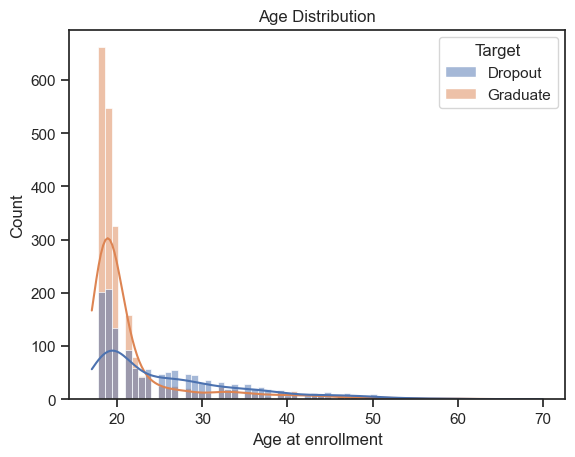

In [59]:
# Plot histogram of features
sns.set(style="ticks", color_codes=True)
sns.histplot(data=students_df, x="Age at enrollment", hue="Target", kde=True)
plt.title("Age Distribution")
plt.show()

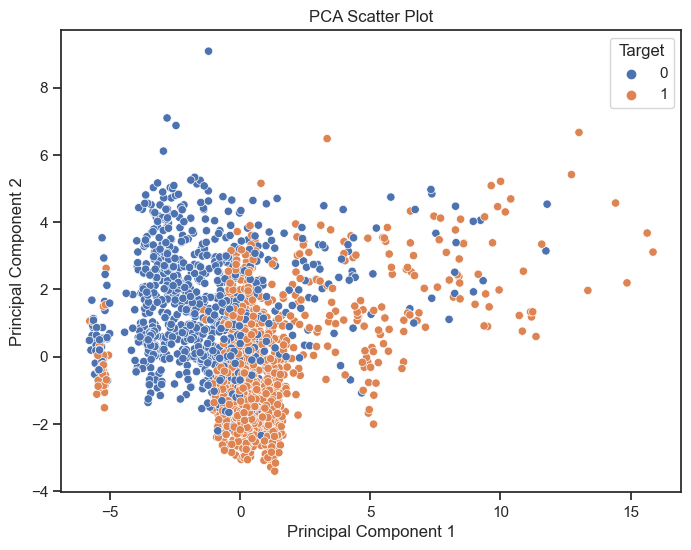

In [61]:
# Initialize a StandardScaler object to scale the features
scaler = StandardScaler()

# Scale the training data using the StandardScaler object
X_scaled = scaler.fit_transform(X_train)

# Initialize a PCA object to perform dimensionality reduction
pca = PCA(n_components=2)

# Fit the PCA object on the scaled training data
pca.fit(X_scaled)

# Use the fitted PCA object to transform the scaled training data into 2 dimensions
X_pca = pca.transform(X_scaled)

# Create a pandas DataFrame with the transformed data and the target values
pca_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
pca_df['Target'] = y_train.values

# Scatter plot of the transformed data
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Target'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.show()

In [ ]:
# Finding highest contributor to the PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X_train.columns)
contributions = pd.DataFrame(np.abs(loadings) * pca.explained_variance_ratio_, columns=['PC1', 'PC2'], index=X_train.columns)
total_contributions = contributions.sum(axis=1)
highest_contributor = total_contributions.idxmax()
print(f'The column with the highest contribution to PCA is {highest_contributor}, with a total contribution of {total_contributions[highest_contributor]:.3f}')

In [60]:
# Get the top attributes contributing to each principal component
n_top = 3
top_attributes_pc1 = loadings['PC1'].abs().sort_values(ascending=False)[:n_top].index.tolist()
top_attributes_pc2 = loadings['PC2'].abs().sort_values(ascending=False)[:n_top].index.tolist()

# Print the top contributing attributes
print(f'Top {n_top} attributes contributing to PC1: {top_attributes_pc1}')
print(f'Top {n_top} attributes contributing to PC2: {top_attributes_pc2}')

Top 3 attributes contributing to PC1: ['Curricular units 1st sem (approved)', 'Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (enrolled)']
Top 3 attributes contributing to PC2: ['Age at enrollment', 'Application mode', 'Displaced']
